<a href="https://colab.research.google.com/github/koushikgptREAL/Natural_Language_Processing/blob/main/2203a51349_assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

max_features = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=200))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 128
epochs = 1
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 129s 797ms/step - accuracy: 0.6149 - loss: 208794000.0000 - val_accuracy: 0.7062 - val_loss: 0.5783
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7013 - loss: 0.5797
Test Accuracy: 0.7044


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

max_features = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)


def build_gru_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=max_len))
    model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def build_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=max_len))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

gru_model = build_gru_model()
gru_history = gru_model.fit(x_train, y_train, batch_size=128, epochs=3, validation_split=0.2)
gru_test_loss, gru_test_acc = gru_model.evaluate(x_test, y_test)

lstm_model = build_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, batch_size=128, epochs=3, validation_split=0.2)
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(x_test, y_test)

print(f"GRU Test Accuracy: {gru_test_acc:.4f}")
print(f"LSTM Test Accuracy: {lstm_test_acc:.4f}")

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 116s 718ms/step - accuracy: 0.5858 - loss: 54165224.0000 - val_accuracy: 0.6902 - val_loss: 0.6099
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 145s 743ms/step - accuracy: 0.7464 - loss: 0.5489 - val_accuracy: 0.7052 - val_loss: 0.5686
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 137s 714ms/step - accuracy: 0.7962 - loss: 122.6269 - val_accuracy: 0.6984 - val_loss: 0.5680
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.6983 - loss: 0.5730
Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 113s 709ms/step - accuracy: 0.6653 - loss: 0.5949 - val_accuracy: 0.8378 - val_loss: 0.3732
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 139s 687ms/step - accuracy: 0.8617 - loss: 0.3375 - val_accuracy: 0.8528 - val_loss: 0.3541
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 143s 694ms/step - accuracy: 0.8884 - loss: 0.2871 - val_accuracy: 0.8550 - val_loss: 0.3679
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.8517 - loss: 0.3743
GRU Test Accuracy: 0.6976
LSTM Test Accuracy: 0.852

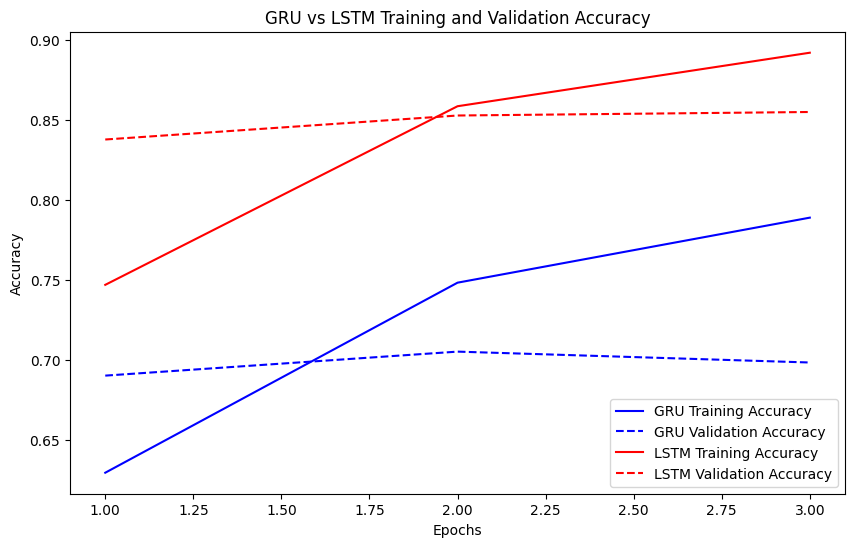

In [ ]:
import matplotlib.pyplot as plt

# Extract history from GRU and LSTM training processes
gru_acc = gru_history.history['accuracy']
gru_val_acc = gru_history.history['val_accuracy']

lstm_acc = lstm_history.history['accuracy']
lstm_val_acc = lstm_history.history['val_accuracy']

# Plotting the accuracies
epochs = range(1, len(gru_acc) + 1)

plt.figure(figsize=(10, 6))

# GRU accuracy
plt.plot(epochs, gru_acc, 'b', label='GRU Training Accuracy')
plt.plot(epochs, gru_val_acc, 'b--', label='GRU Validation Accuracy')

# LSTM accuracy
plt.plot(epochs, lstm_acc, 'r', label='LSTM Training Accuracy')
plt.plot(epochs, lstm_val_acc, 'r--', label='LSTM Validation Accuracy')

plt.title('GRU vs LSTM Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
